# <font color='orange'> **A. REGRESSION ALGORITHM**

In [49]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Axes: xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'Scatter Plot of Generated Data')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

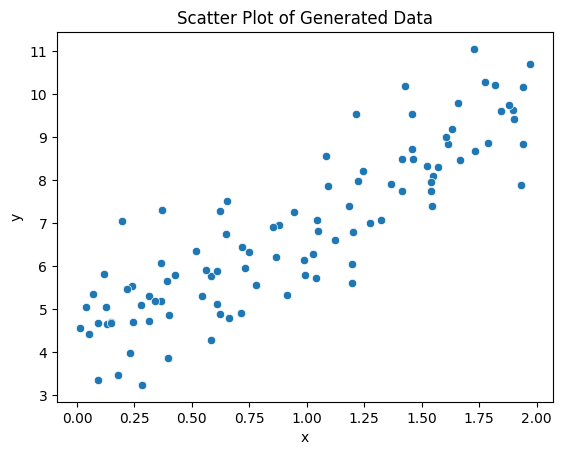

LinearRegression()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Simple Linear Regression')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

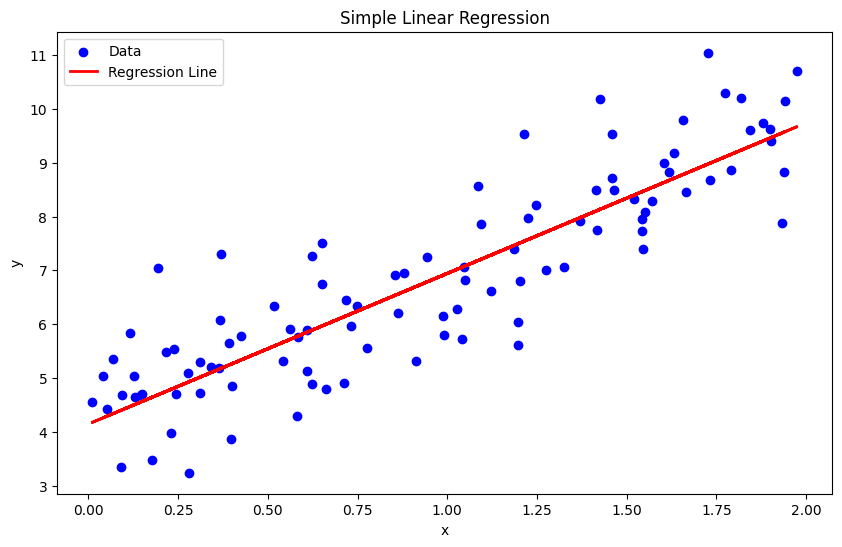

Mean Squared Error: 0.65


In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# 데이터프레임으로 변환
data = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})

# 데이터 시각화
sns.scatterplot(x='x', y='y', data=data)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 학습 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(x_train, y_train)

# 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 모델 평가
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# <font color='orange'> **B. CLASSIFICATION ALGORITHM**


## **1. Dummy Classifier, Explained: A Visual Guide with Code Examples for Beginners**
### **[Source](https://towardsdatascience.com/dummy-classifier-explained-a-visual-guide-with-code-examples-for-beginners-009ff95fc86e)**

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Make dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)
df.head()

# Perform one-hot encoding on 'Outlook' column
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df.head()

# Convert 'Wind' and 'Play' columns to binary indicators
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Split data into features (X) and target (y), then into training and test sets
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Initialize and train the dummy classifier model
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

# Model
print(f"모델 파라미터: {dummy_clf.get_params()}\n")

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Calculate and print the model's accuracy on the test data
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.4f}%")


,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,No
1,sunny,80.0,90.0,True,No
2,overcast,83.0,78.0,False,Yes
3,rain,70.0,96.0,False,Yes
4,rain,68.0,80.0,False,Yes


,Temperature,Humidity,Wind,Play,overcast,rain,sunny
0,85.0,85.0,False,No,0,0,1
1,80.0,90.0,True,No,0,0,1
2,83.0,78.0,False,Yes,1,0,0
3,70.0,96.0,False,Yes,0,1,0
4,68.0,80.0,False,Yes,0,1,0


DummyClassifier(strategy='most_frequent')

모델 파라미터: {'constant': None, 'random_state': None, 'strategy': 'most_frequent'}

Accuracy: 64.2857%


## **2. K Nearest Neighbor Classifier**

In [28]:
# Import libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Standardize features
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train model
knn_clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_clf.fit(X_train, y_train)

# Model
print(f"모델 파라미터: {knn_clf.get_params()}\n")

# Predict and evaluate
y_pred = knn_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

모델 파라미터: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Accuracy: 0.7857142857142857


## **3. Naive Bayes**
## **3.1. Bernoulli Naive Bayes**

In [29]:
from sklearn.naive_bayes import BernoulliNB

# Scale numerical features (for automatic binarization)
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train the model
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

# Model
print(f"모델 파라미터: {nb_clf.get_params()}\n")

# Make predictions
y_pred = nb_clf.predict(X_test)

# Check accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

BernoulliNB()

모델 파라미터: {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

Accuracy: 0.8571428571428571


## **3.2. Bernoulli Naive Bayes**
- Since we are not really sure about the distribution of our data, especially for features that clearly don’t follow a Gaussian distribution, applying a power transformation (like Box-Cox) before using Gaussian Naive Bayes can be beneficial. This approach can help make the data more Gaussian-like, which aligns better with the assumptions of the algorithm.

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

# Apply PowerTransformer
pt = PowerTransformer(standardize=True)
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

# Train the model
nb_clf = GaussianNB()
nb_clf.fit(X_train_transformed, y_train)

# Model
print(f"모델 파라미터: {nb_clf.get_params()}\n")

# Make predictions
y_pred = nb_clf.predict(X_test_transformed)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


GaussianNB()

모델 파라미터: {'priors': None, 'var_smoothing': 1e-09}

Accuracy: 0.7143


## **4. Decision Tree Classifier**

DecisionTreeClassifier()

모델 파라미터: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Accuracy: 0.7142857142857143


<Figure size 1000x1500 with 0 Axes>

[Text(0.6666666666666666, 0.9166666666666666, 'overcast <= 0.5\nsamples = 14\nvalue = [5, 9]\nclass = Play'),
 Text(0.5, 0.75, 'Temperature <= 0.62\nsamples = 10\nvalue = [5, 5]\nclass = Not Play'),
 Text(0.5833333333333333, 0.8333333333333333, 'True  '),
 Text(0.3333333333333333, 0.5833333333333334, 'Temperature <= -1.117\nsamples = 8\nvalue = [3, 5]\nclass = Play'),
 Text(0.16666666666666666, 0.4166666666666667, 'samples = 1\nvalue = [1, 0]\nclass = Not Play'),
 Text(0.5, 0.4166666666666667, 'Temperature <= -0.485\nsamples = 7\nvalue = [2, 5]\nclass = Play'),
 Text(0.3333333333333333, 0.25, 'samples = 3\nvalue = [0, 3]\nclass = Play'),
 Text(0.6666666666666666, 0.25, 'Temperature <= -0.011\nsamples = 4\nvalue = [2, 2]\nclass = Not Play'),
 Text(0.5, 0.08333333333333333, 'samples = 2\nvalue = [2, 0]\nclass = Not Play'),
 Text(0.8333333333333334, 0.08333333333333333, 'samples = 2\nvalue = [0, 2]\nclass = Play'),
 Text(0.6666666666666666, 0.5833333333333334, 'samples = 2\nvalue = [2, 0]

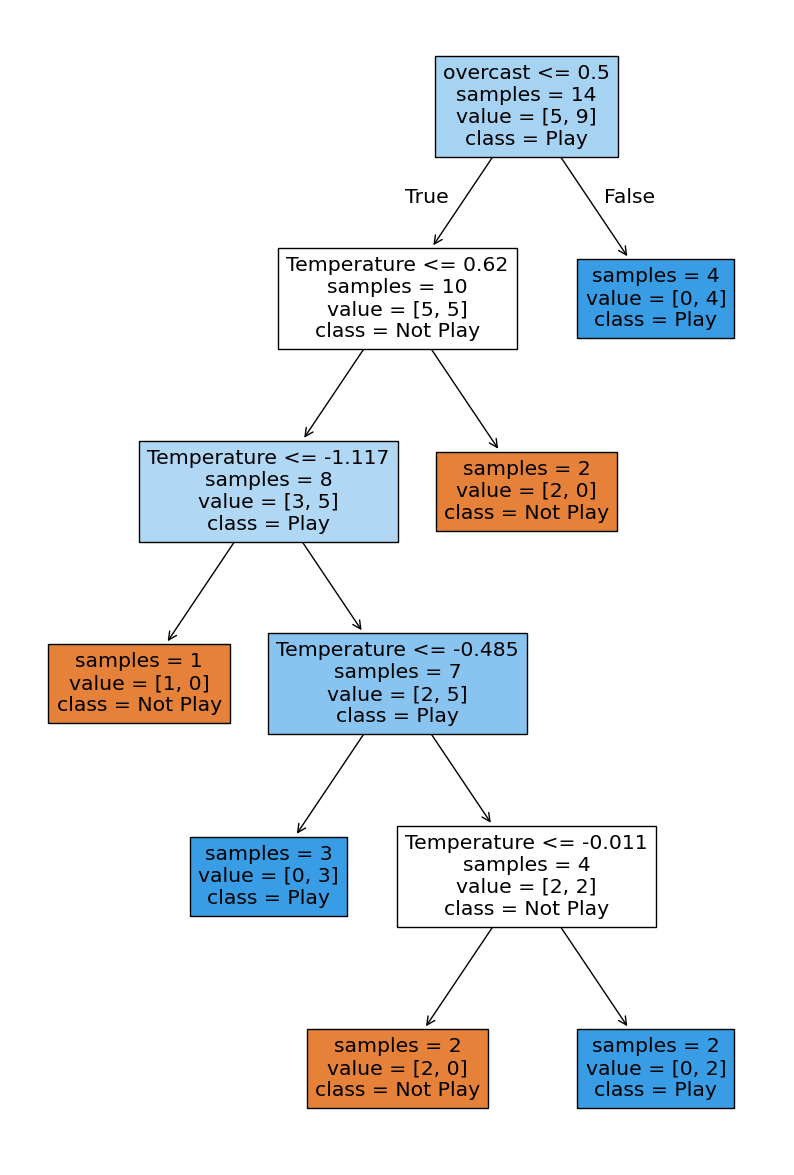

In [43]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt

# Train model
dt_clf = DecisionTreeClassifier(
    max_depth=None,           # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
)
dt_clf.fit(X_train, y_train)

# Model
print(f"모델 파라미터: {dt_clf.get_params()}\n")

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualize tree
plt.figure(figsize=(10, 15))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)

plt.show()

## **5. Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression

# Scale numerical features
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Train the model
lr_clf = LogisticRegression(penalty='l2', C=1, solver='saga')
lr_clf.fit(X_train, y_train)

# Model
print(f"모델 파라미터: {lr_clf.get_params()}\n")

# Make predictions
y_pred = lr_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

LogisticRegression(C=1, solver='saga')

모델 파라미터: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy: 0.9285714285714286


## **6. Support Vector Classifier**

In [47]:
from sklearn.svm import SVC

# Create DataFrame
df = pd.DataFrame({
    '🌞': [0, 1, 1, 2, 3, 3, 2, 3, 0, 0, 1, 2, 3],
    '💧': [0, 0, 1, 0, 1, 2, 3, 3, 1, 2, 3, 2, 1],
    'y': [1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1]
}, index=range(1, 14))
df

# Split into train and test
train_df, test_df = df.iloc[:8].copy(), df.iloc[8:].copy()
X_train, y_train = train_df[['🌞', '💧']], train_df['y']
X_test, y_test = test_df[['🌞', '💧']], test_df['y']

# Create and fit SVC model
svc = SVC(kernel='linear', C=2)
svc.fit(X_train, y_train)

# Model
print(f"모델 파라미터: {svc.get_params()}\n")

# Add Lagrange multipliers and support vector status
train_df['α'] = 0.0
train_df.loc[svc.support_ + 1, 'α'] = np.abs(svc.dual_coef_[0])
train_df['Is SV'] = train_df.index.isin(svc.support_ + 1)

print("Training Data, Lagrange Multipliers, and Support Vectors:")
train_df

# Print model parameters
w, b = svc.coef_[0], svc.intercept_[0]
print(f"\nModel Parameters:")
print(f"Weights (w): [{w[0]}, {w[1]}]")
print(f"Bias (b): {b}")
print(f"Decision function: f(🌞,💧) = ({w[0]})🌞 + ({w[1]})💧 + ({b})")

# Make predictions
test_df['ŷ'] = svc.predict(X_test)

print("\nTest Data and Predictions:")
test_df

,🌞,💧,y
1,0,0,1
2,1,0,-1
3,1,1,-1
4,2,0,-1
5,3,1,1
6,3,2,1
7,2,3,1
8,3,3,-1
9,0,1,-1
10,0,2,-1


SVC(C=2, kernel='linear')

모델 파라미터: {'C': 2, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Training Data, Lagrange Multipliers, and Support Vectors:


,🌞,💧,y,α,Is SV
1,0,0,1,2.00,True
2,1,0,-1,0.75,True
3,1,1,-1,2.00,True
4,2,0,-1,2.00,True
5,3,1,1,2.00,True
6,3,2,1,1.75,True
7,2,3,1,1.00,True
8,3,3,-1,2.00,True



Model Parameters:
Weights (w): [0.5, 0.5]
Bias (b): -1.5
Decision function: f(🌞,💧) = (0.5)🌞 + (0.5)💧 + (-1.5)

Test Data and Predictions:


,🌞,💧,y,ŷ
9,0,1,-1,-1
10,0,2,-1,-1
11,1,3,1,1
12,2,2,1,1
13,3,1,1,1
